In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.rcParams.update({'figure.figsize': (7,3), 'figure.dpi': 120})

In [2]:
df_anime = pd.read_csv(r'https://raw.githubusercontent.com/baothanhquach1661/DataSet/main/anime.csv')
df_rating = pd.read_csv(r'https://raw.githubusercontent.com/baothanhquach1661/DataSet/main/rating.csv')

## Data Loading

In [3]:
df_anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
print(f"df anime (row, col): {df_anime.shape}\n\ndf rating (row, col): {df_rating.shape}")

df anime (row, col): (12294, 7)

df rating (row, col): (7813737, 3)


In [6]:
print("Anime Info: ")
print(df_anime.info())
print("\n", "*"*50, "\n")
print("Rating Info: ")
print(df_rating.info())

Anime Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None

 ************************************************** 

Rating Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


## Data Cleaning

#### Check Missing Values

In [7]:
df_anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [8]:
df_rating.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

#### Remove Missing Values

In [9]:
df_anime.dropna(axis=0, inplace=True)
df_anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

#### Check Duplicates

In [10]:
duplicated_anime = df_anime[df_anime.duplicated()].shape[0]
print(f"Count of duplicated value: {duplicated_anime}")

Count of duplicated value: 0


In [11]:
duplicated_rating = df_rating[df_rating.duplicated()].shape[0]
print(f"Count of duplicated value: {duplicated_rating}")

Count of duplicated value: 1


#### Remove Duplicates

In [12]:
df_rating.drop_duplicates(keep='first', inplace=True)

duplicated_rating = df_rating[df_rating.duplicated()].shape[0]
print(f"Count of duplicated value: {duplicated_rating}")

Count of duplicated value: 0


## Exploratory Data

#### Anime Type

In [13]:
df_anime.value_counts('type')

type
TV         3668
OVA        3284
Movie      2259
Special    1670
ONA         648
Music       488
dtype: int64

In [14]:
print("Anime Type Distribution")
print(round(df_anime.value_counts('type', normalize=True).mul(100), 2))

Anime Type Distribution
type
TV         30.52
OVA        27.33
Movie      18.80
Special    13.90
ONA         5.39
Music       4.06
dtype: float64


<Axes: xlabel='type', ylabel='count'>

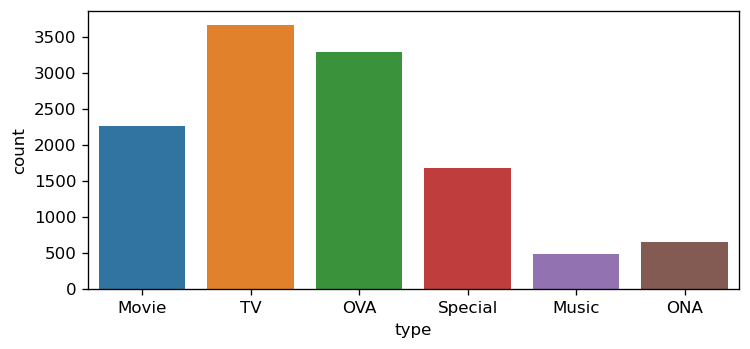

In [15]:
sns.countplot(x=df_anime.type)

#### Insights:
    . Out of total anime type, almost are aired on TV (30% - 3668)
    . OVA (Original video animation) format constitutes (27% - 3284)
    . Movie is another popular format, with (19% - 2259 )

#### Top Anime by Community

In [16]:
top_anime_member = df_anime.sort_values(['members'], ascending=False)

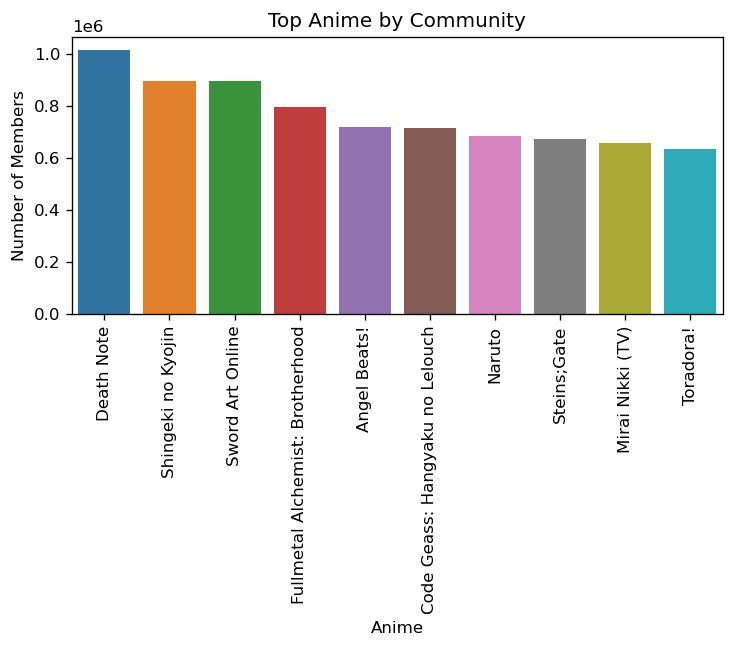

In [17]:
sns.barplot(x=top_anime_member['name'][:10], y=top_anime_member['members'][:10])
plt.title('Top Anime by Community')
plt.xlabel('Anime')
plt.ylabel('Number of Members')
plt.xticks(rotation=90);

#### Top Anime by Rating

In [18]:
top_anime_rating = df_anime.sort_values(['rating'], ascending=False)

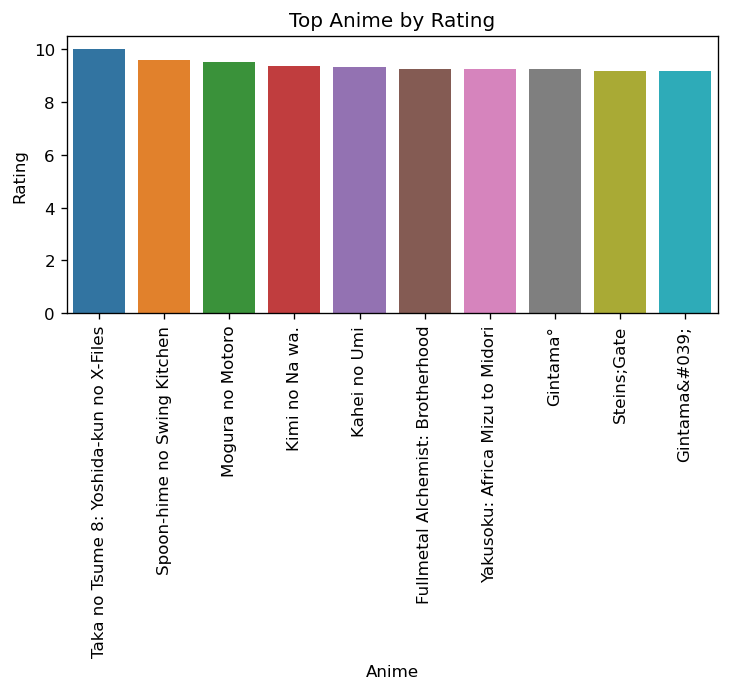

In [19]:
sns.barplot(x=top_anime_rating['name'][:10], y=top_anime_rating['rating'][:10])
plt.title('Top Anime by Rating')
plt.xlabel('Anime')
plt.ylabel('Rating')
plt.xticks(rotation=90);

#### Overall Anime Rating

Text(0.5, 1.0, 'Average Rating Distribution')

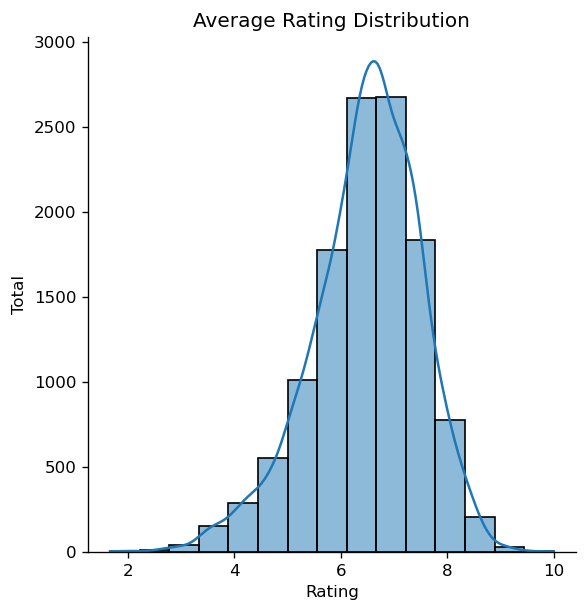

In [20]:
sns.displot(data=df_anime, x='rating', kde=True, bins=15)
plt.xlabel('Rating')
plt.ylabel('Total')
plt.title('Average Rating Distribution')

#### Merge Data

In [21]:
data = pd.merge(df_anime, df_rating, on="anime_id", suffixes=[None, "_user"])
data = data.rename(columns={"rating_user": "user_rating"})

print(f"Shape of merged data: {data.shape}")

Shape of merged data: (7813610, 9)


In [22]:
data.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


#### User rating Distribution

In [23]:
user_rating_count = data['user_rating'].value_counts().sort_index()
user_rating_count

-1     1476465
 1       16644
 2       23140
 3       41437
 4      104275
 5      282791
 6      637762
 7     1375277
 8     1646017
 9     1254090
 10     955712
Name: user_rating, dtype: int64

Text(0.5, 1.0, 'User Rating Distribution')

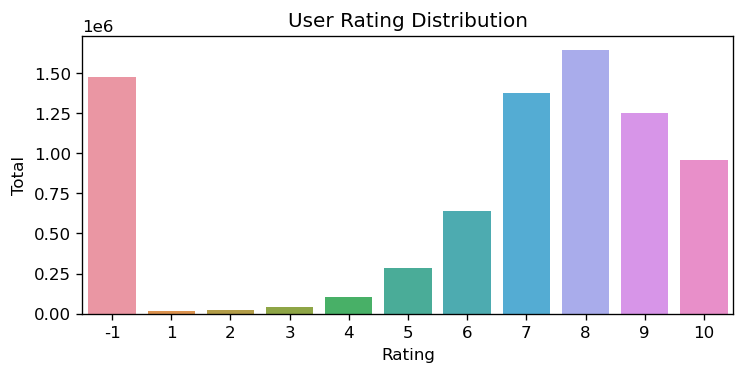

In [24]:
sns.barplot(x=user_rating_count.index, y=user_rating_count.values)
plt.xlabel('Rating')
plt.ylabel('Total')
plt.title('User Rating Distribution')

#### Insights:
    . The chart are distributed between 5 and 10, suggesting a higher inclination towards positive rating.
    . On the otherhand, rating of -1. This can be considered an anormaly and can be discarded from the analysis.

#### Genre

In [25]:
genre = df_anime['genre'].value_counts()
genre

Hentai                                                   816
Comedy                                                   521
Music                                                    297
Kids                                                     197
Comedy, Slice of Life                                    174
                                                        ... 
Adventure, Comedy, Horror, Shounen, Supernatural           1
Comedy, Harem, Romance, School, Seinen, Slice of Life      1
Comedy, Ecchi, Sci-Fi, Shounen                             1
Adventure, Shounen, Sports                                 1
Hentai, Slice of Life                                      1
Name: genre, Length: 3229, dtype: int64

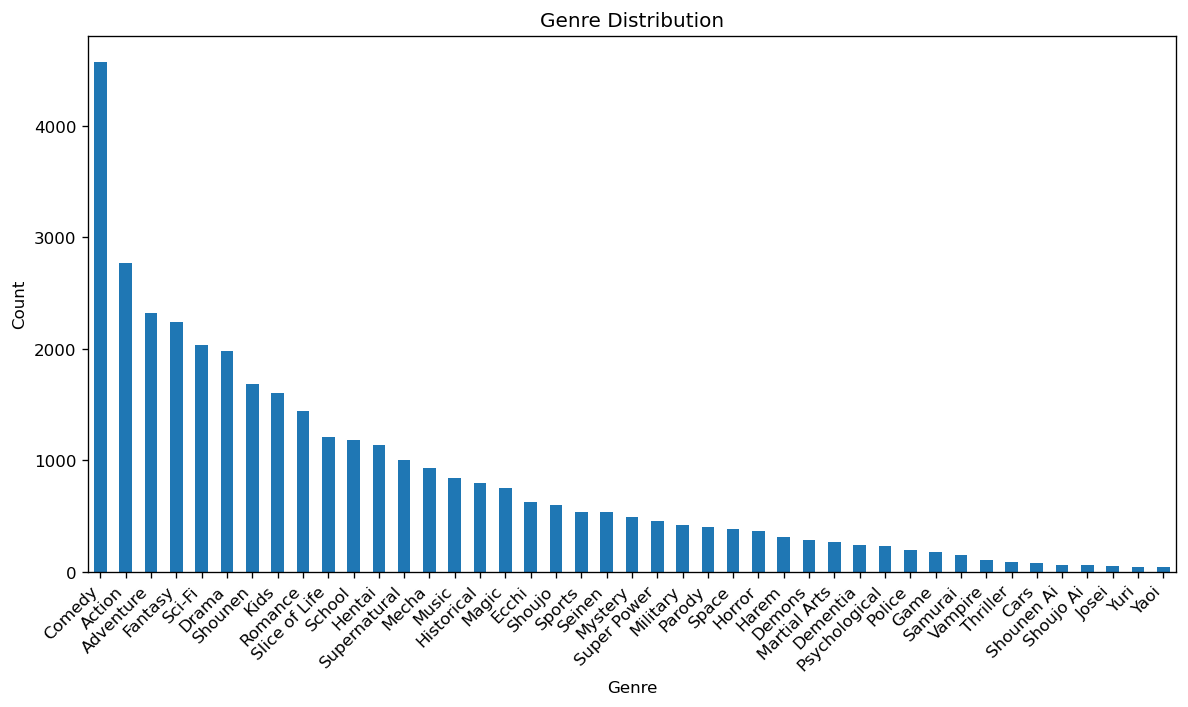

In [26]:
genre_counts = df_anime['genre'].str.split(', ').explode().value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Data Preprocessing

#### Drop Records
    As the chart showed above, we have to remove rows where user_rating = -1 as user has viewed the anime but no rating has been given

In [27]:
data['user_rating'].replace(to_replace= -1, value=np.nan, inplace=True)
data = data.dropna(axis=0)
data.isnull().sum()

anime_id       0
name           0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

In [28]:
print(f"New shape of merged data: {data.shape}")

New shape of merged data: (6337145, 9)


#### Handle Japanese & Special Character

In [29]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

data["name"] = data["name"].apply(text_cleaning)

#  ---------------------------------- Anime Analysis  ---------------------------------- #

    


In [30]:
df_anime_id = df_anime.set_index('anime_id')
df_rating_id = df_rating.set_index('anime_id')

df = pd.merge(df_anime_id, df_rating_id, on="anime_id", suffixes=[None, "_user"])
df = df.rename(columns={"rating_user": "user_rating"})

df = df[df['user_rating'] != -1]

# Calculate the frequencies of unique values in te specified column
value_counts = df['user_id'].value_counts()
print(value_counts)

# Sort data based on the frequencies in descending order
sorted_df = df.sort_values(by='user_id', key=lambda x: x.map(value_counts), ascending=False)
df = df[df['user_id'] == 42635]
df.head()

42635    3747
53698    2905
57620    2689
59643    2632
51693    2620
         ... 
41324       1
11199       1
19041       1
26082       1
62930       1
Name: user_id, Length: 69600, dtype: int64


,name,genre,type,episodes,rating,members,user_id,user_rating
anime_id,,,,,,,,
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,42635,6
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,42635,8
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,42635,8
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,42635,6
11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,42635,7


In [31]:
# Split the genre column by comma and expand the list to a col for each genre
# now we have 13 columns
genres = df.genre.str.split(', ', expand=True)

In [32]:
# Convert dataframe into a single dimension array and take the unique values
unique_genres = pd.Series(genres.values.ravel('K')).dropna().unique()

In [33]:
# Getting a dummy variables will get more columns than unique genres
dummies = pd.get_dummies(genres)

In [34]:
# Getting a single column for each genre
for i in unique_genres:
    df[i] = dummies.loc[:, dummies.columns.str.endswith(i)].sum(axis=1)

In [35]:
# add the type of dummies
type_dummies = pd.get_dummies(df.type, prefix='Type:', prefix_sep=' ')
df = pd.concat([df, type_dummies], axis=1)

In [36]:
df = df.drop(columns=["name", "type", "genre", "episodes", "rating", "members", 'user_id', 
                                                'Type: Movie', 'Type: ONA', 'Type: OVA', 'Type: Special','Type: TV', 'Type: Music'])

In [37]:
df.sample(5)

,user_rating,Action,Sci-Fi,Drama,Comedy,Adventure,Fantasy,Mystery,Psychological,Ecchi,...,Yaoi,Thriller,Police,Supernatural,Samurai,Shoujo Ai,Shounen Ai,Space,Vampire,Yuri
anime_id,,,,,,,,,,,,,,,,,,,,,
9367,5,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19195,8,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
9938,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
713,6,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
28405,7,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Calculate the mean and standard deviation of the user_rating column
mean = df['user_rating'].mean()
std = df['user_rating'].std()

# Define a function to apply to each row in the user_rating column
def label(row):
    if row['user_rating'] > mean + std:
        return 1
    elif row['user_rating'] < mean - std:
        return 0
    else:
        return np.nan

df['boolean_rating'] = df.apply(label, axis=1)
df = df.drop(columns=['user_rating'])

In [39]:
# After created boolean_rating column, we got a lot na values
# df.isna().sum()

df = df.dropna(subset=['boolean_rating'])
df.head()

,Action,Sci-Fi,Drama,Comedy,Adventure,Fantasy,Mystery,Psychological,Ecchi,Josei,...,Thriller,Police,Supernatural,Samurai,Shoujo Ai,Shounen Ai,Space,Vampire,Yuri,boolean_rating
anime_id,,,,,,,,,,,,,,,,,,,,,
28977,1,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0
9253,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.0
820,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
4181,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
199,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0


#### Train | Test Split

In [40]:
from sklearn.model_selection import train_test_split

X = df.drop('boolean_rating', axis=1)
y = df['boolean_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# X_train.iloc[0]

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

def print_score(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        preds = model.predict(X_train)
        model_report = pd.DataFrame(classification_report(y_train, preds, output_dict=True))
        printmd("<b style='font-size:16px'>Train Result: </b> \n")
        print(f"Accuracy Score: {accuracy_score(y_train, preds) * 100:.2f}%")
        print("-"*66)
        print(f"Classification Report: \n {model_report}")
        print("-"*66)
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, preds)}")
    elif train == False:
        preds = model.predict(X_test)
        model_report = pd.DataFrame(classification_report(y_test, preds, output_dict=True))
        printmd("<b style='font-size:16px'>Test Result: </b> \n")
        print(f"Accuracy Score: {accuracy_score(y_test, preds) * 100:.2f}%")
        print("-"*66)
        print(f"Classification Report: \n {model_report}")
        print("-"*66)
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, preds)} \n")

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

print_score(log_model, X_train, y_train, X_test, y_test, train=True)
print_score(log_model, X_train, y_train, X_test, y_test, train=False)

<b style='font-size:16px'>Train Result: </b> 


Accuracy Score: 80.30%
------------------------------------------------------------------
Classification Report: 
                   0.0         1.0  accuracy    macro avg  weighted avg
precision    0.825166    0.751534   0.80296     0.788350      0.799486
recall       0.884943    0.649867   0.80296     0.767405      0.802960
f1-score     0.854010    0.697013   0.80296     0.775511      0.799257
support    704.000000  377.000000   0.80296  1081.000000   1081.000000
------------------------------------------------------------------
Confusion Matrix: 
 [[623  81]
 [132 245]]


<b style='font-size:16px'>Test Result: </b> 


Accuracy Score: 76.01%
------------------------------------------------------------------
Classification Report: 
                   0.0        1.0  accuracy   macro avg  weighted avg
precision    0.785340   0.700000  0.760148    0.742670      0.754794
recall       0.862069   0.577320  0.760148    0.719694      0.760148
f1-score     0.821918   0.632768  0.760148    0.727343      0.754215
support    174.000000  97.000000  0.760148  271.000000    271.000000
------------------------------------------------------------------
Confusion Matrix: 
 [[150  24]
 [ 41  56]] 



## KNN - KNeighbors

In [44]:
# from sklearn.neighbors import KNeighborsClassifier

# knn_model = KNeighborsClassifier()
# knn_model.fit(X_train, y_train)

# print_score(knn_model, X_train, y_train, X_test, y_test, train=True)
# print_score(knn_model, X_train, y_train, X_test, y_test, train=False)

## Support Vector Machine 

In [45]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_model.fit(X_train, y_train)

print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

<b style='font-size:16px'>Train Result: </b> 


Accuracy Score: 82.70%
------------------------------------------------------------------
Classification Report: 
                   0.0         1.0  accuracy    macro avg  weighted avg
precision    0.829299    0.820946  0.827012     0.825123      0.826386
recall       0.924716    0.644562  0.827012     0.784639      0.827012
f1-score     0.874412    0.722140  0.827012     0.798276      0.821307
support    704.000000  377.000000  0.827012  1081.000000   1081.000000
------------------------------------------------------------------
Confusion Matrix: 
 [[651  53]
 [134 243]]


<b style='font-size:16px'>Test Result: </b> 


Accuracy Score: 74.91%
------------------------------------------------------------------
Classification Report: 
                   0.0        1.0  accuracy   macro avg  weighted avg
precision    0.762376   0.710145  0.749077    0.736261      0.743681
recall       0.885057   0.505155  0.749077    0.695106      0.749077
f1-score     0.819149   0.590361  0.749077    0.704755      0.737258
support    174.000000  97.000000  0.749077  271.000000    271.000000
------------------------------------------------------------------
Confusion Matrix: 
 [[154  20]
 [ 48  49]] 



## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print_score(dt_model, X_train, y_train, X_test, y_test, train=True)
print_score(dt_model, X_train, y_train, X_test, y_test, train=False)

<b style='font-size:16px'>Train Result: </b> 


Accuracy Score: 94.91%
------------------------------------------------------------------
Classification Report: 
                   0.0         1.0  accuracy    macro avg  weighted avg
precision    0.936743    0.976331  0.949121     0.956537      0.950549
recall       0.988636    0.875332  0.949121     0.931984      0.949121
f1-score     0.961990    0.923077  0.949121     0.942534      0.948419
support    704.000000  377.000000  0.949121  1081.000000   1081.000000
------------------------------------------------------------------
Confusion Matrix: 
 [[696   8]
 [ 47 330]]


<b style='font-size:16px'>Test Result: </b> 


Accuracy Score: 78.60%
------------------------------------------------------------------
Classification Report: 
                   0.0        1.0  accuracy   macro avg  weighted avg
precision    0.818681   0.719101  0.785978    0.768891      0.783038
recall       0.856322   0.659794  0.785978    0.758058      0.785978
f1-score     0.837079   0.688172  0.785978    0.762625      0.783780
support    174.000000  97.000000  0.785978  271.000000    271.000000
------------------------------------------------------------------
Confusion Matrix: 
 [[149  25]
 [ 33  64]] 



## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print_score(rf_model, X_train, y_train, X_test, y_test, train=True)
print_score(rf_model, X_train, y_train, X_test, y_test, train=False)

<b style='font-size:16px'>Train Result: </b> 


Accuracy Score: 94.82%
------------------------------------------------------------------
Classification Report: 
                   0.0         1.0  accuracy    macro avg  weighted avg
precision    0.941417    0.962536  0.948196     0.951976      0.948782
recall       0.981534    0.885942  0.948196     0.933738      0.948196
f1-score     0.961057    0.922652  0.948196     0.941854      0.947663
support    704.000000  377.000000  0.948196  1081.000000   1081.000000
------------------------------------------------------------------
Confusion Matrix: 
 [[691  13]
 [ 43 334]]


<b style='font-size:16px'>Test Result: </b> 


Accuracy Score: 82.66%
------------------------------------------------------------------
Classification Report: 
                   0.0        1.0  accuracy   macro avg  weighted avg
precision    0.835979   0.804878  0.826568    0.820428      0.824847
recall       0.908046   0.680412  0.826568    0.794229      0.826568
f1-score     0.870523   0.737430  0.826568    0.803977      0.822885
support    174.000000  97.000000  0.826568  271.000000    271.000000
------------------------------------------------------------------
Confusion Matrix: 
 [[158  16]
 [ 31  66]] 



## Ada Boost

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=1)
ada_model.fit(X_train, y_train)

print_score(ada_model, X_train, y_train, X_test, y_test, train=True)
print_score(ada_model, X_train, y_train, X_test, y_test, train=False)

<b style='font-size:16px'>Train Result: </b> 


Accuracy Score: 69.94%
------------------------------------------------------------------
Classification Report: 
                   0.0         1.0  accuracy    macro avg  weighted avg
precision    0.726946    0.605691  0.699352     0.666319      0.684658
recall       0.862216    0.395225  0.699352     0.628721      0.699352
f1-score     0.788824    0.478331  0.699352     0.633577      0.680539
support    704.000000  377.000000  0.699352  1081.000000   1081.000000
------------------------------------------------------------------
Confusion Matrix: 
 [[607  97]
 [228 149]]


<b style='font-size:16px'>Test Result: </b> 


Accuracy Score: 70.11%
------------------------------------------------------------------
Classification Report: 
                   0.0        1.0  accuracy   macro avg  weighted avg
precision    0.714286   0.648148  0.701107    0.681217      0.690613
recall       0.890805   0.360825  0.701107    0.625815      0.701107
f1-score     0.792839   0.463576  0.701107    0.628208      0.674985
support    174.000000  97.000000  0.701107  271.000000    271.000000
------------------------------------------------------------------
Confusion Matrix: 
 [[155  19]
 [ 62  35]] 



## Model Testing

In [49]:
test_data_sample = X_test.iloc[:5]
print("Sample test data: ")
print(test_data_sample)

Sample test data: 
          Action  Sci-Fi  Drama  Comedy  Adventure  Fantasy  Mystery  \
anime_id                                                               
32             0       1      1       0          0        0        0   
9776           0       0      0       1          0        0        0   
9423           0       0      0       0          0        0        0   
4262           1       0      0       0          1        1        0   
17345          0       0      0       0          0        0        0   

          Psychological  Ecchi  Josei  ...  Yaoi  Thriller  Police  \
anime_id                               ...                           
32                    1      0      0  ...     0         0       0   
9776                  0      0      0  ...     0         0       0   
9423                  0      0      0  ...     0         0       0   
4262                  0      0      0  ...     0         0       0   
17345                 0      1      0  ...     0        

In [50]:
expected_output_sample = y_test.iloc[:5]
print("Expected output for test data: ")
print(expected_output_sample)

Expected output for test data: 
anime_id
32       1.0
9776     0.0
9423     1.0
4262     0.0
17345    0.0
Name: boolean_rating, dtype: float64


In [51]:
predicted_output_sample = log_model.predict(test_data_sample)
print("Predicted output for test data: ")
print(predicted_output_sample)

Predicted output for test data: 
[1. 0. 0. 1. 0.]


In [52]:
final_model = LogisticRegression()
final_model.fit(X,y)

LogisticRegression()

In [53]:
import joblib

joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [54]:
# list(X.columns)

In [55]:
joblib.dump(list(X.columns), 'col_names.pkl')

['col_names.pkl']

### Loading Model

In [56]:
new_cols = joblib.load('col_names.pkl')
# new_cols

In [57]:
loaded_model = joblib.load('final_model.pkl')

In [58]:
test_anime_id_32 = X_test.iloc[:1]
test_anime_id_32

,Action,Sci-Fi,Drama,Comedy,Adventure,Fantasy,Mystery,Psychological,Ecchi,Josei,...,Yaoi,Thriller,Police,Supernatural,Samurai,Shoujo Ai,Shounen Ai,Space,Vampire,Yuri
anime_id,,,,,,,,,,,,,,,,,,,,,
32,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Testing on anime_id 32
loaded_model.predict(test_anime_id_32)

array([1.])

#  ---------------------------- Recommendation System  ---------------------------- #

    


#### Extract number of reviews
    This will help us in building recommendation system

In [60]:
# Extract review count
review_count = data.groupby('anime_id').size().reset_index()
review_count.columns = ['anime_id', 'review_count']

# Merge review count into original data
data = data.merge(review_count, on='anime_id')

data.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating,review_count
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,1961
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,1961
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,1961
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,1961
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0,1961


### 1. Avg Weighted Technique & Popularity

#### Recommendation by Avg Weight Rating (Considering both rating & no. of reviews)

In [61]:
# Extract anime_id, rating, review_count & members for each one
weighted_data = data.groupby('anime_id')[['name', 'rating', 'review_count', 'members']].max().reset_index()
weighted_data.head()

,anime_id,name,rating,review_count,members
0,1,Cowboy Bebop,8.82,13449,486824
1,5,Cowboy Bebop: Tengoku no Tobira,8.40,5790,137636
2,6,Trigun,8.32,9385,283069
3,7,Witch Hunter Robin,7.36,2169,64905
4,8,Beet the Vandel Buster,7.06,308,9848


In [62]:
# Calculate all the components to calculate avg weighted rating
v = weighted_data['review_count']
R = weighted_data['rating']
C = weighted_data['rating'].mean()
m = weighted_data['review_count'].quantile(0.50)

weighted_data['weighted_average'] = ((R*v) + (C*m)) / (v+m)
weighted_data.head()

,anime_id,name,rating,review_count,members,weighted_average
0,1,Cowboy Bebop,8.82,13449,486824,8.810598
1,5,Cowboy Bebop: Tengoku no Tobira,8.40,5790,137636,8.382377
2,6,Trigun,8.32,9385,283069,8.309570
3,7,Witch Hunter Robin,7.36,2169,64905,7.340342
4,8,Beet the Vandel Buster,7.06,308,9848,6.986961


Text(0, 0.5, 'Anime')

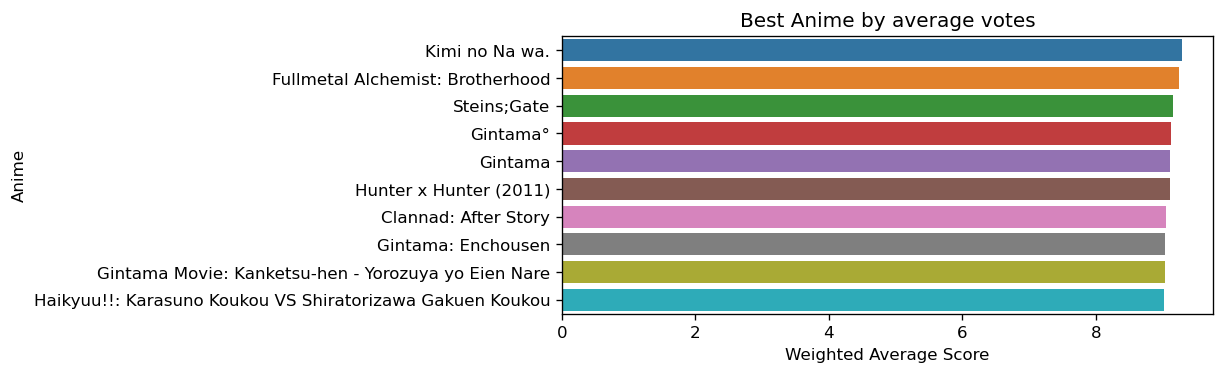

In [63]:
weighted_average = weighted_data.sort_values('weighted_average', ascending=False)

ax = sns.barplot(data=weighted_average, x=weighted_average['weighted_average'].head(10), 
                 y=weighted_average['name'].head(10))
plt.title('Best Anime by average votes')
plt.xlabel('Weighted Average Score')
plt.ylabel('Anime')

#### Insights:
    So top recommendations based on weighted average rating are Kimi no Na wa and Fullmetal Alchemist...

#### Recommendation by Popularity

Text(0, 0.5, 'Anime')

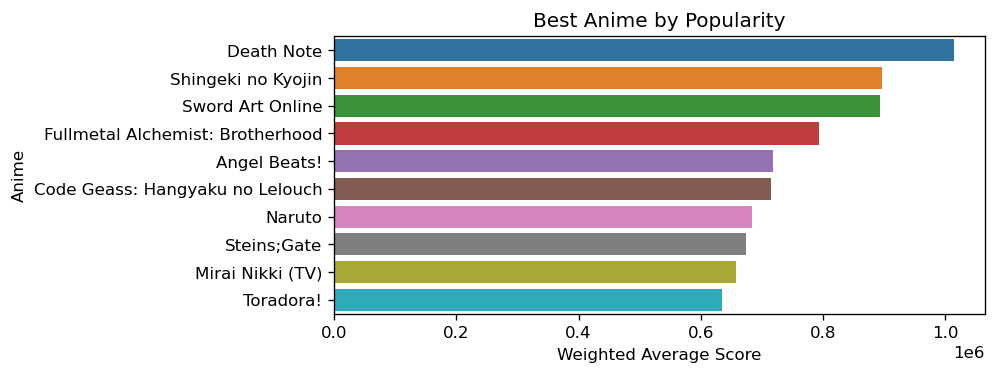

In [64]:
popularity_ranking = weighted_data.sort_values('members', ascending=False)

ax = sns.barplot(data=popularity_ranking, x=popularity_ranking['members'].head(10), 
                 y=popularity_ranking['name'].head(10))
plt.title('Best Anime by Popularity')
plt.xlabel('Weighted Average Score')
plt.ylabel('Anime')

#### Insights:
    So top recommendations based on popularity are Death Note and Shingeki no ...

#### Recommendation by Average weighted and popularity

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(weighted_data[['weighted_average', 'members']])

scaled_df = pd.DataFrame(scaled_df, columns=['weighted_average', 'members'])

scaled_df.head()

,weighted_average,members
0,0.928206,0.480125
1,0.864282,0.135719
2,0.853413,0.279160
3,0.708729,0.063984
4,0.655976,0.009681


In [66]:
weighted_data[['normalized_weight_average', 'normalized_members']] = scaled_df

weighted_data.head()

,anime_id,name,rating,review_count,members,weighted_average,normalized_weight_average,normalized_members
0,1,Cowboy Bebop,8.82,13449,486824,8.810598,0.928206,0.480125
1,5,Cowboy Bebop: Tengoku no Tobira,8.40,5790,137636,8.382377,0.864282,0.135719
2,6,Trigun,8.32,9385,283069,8.309570,0.853413,0.279160
3,7,Witch Hunter Robin,7.36,2169,64905,7.340342,0.708729,0.063984
4,8,Beet the Vandel Buster,7.06,308,9848,6.986961,0.655976,0.009681


In [67]:
# Generate score by giving equal weight to popularity & weighted avg
weighted_data['score'] = ( weighted_data['normalized_weight_average'] + weighted_data['normalized_members'] ) / 2

weighted_data.sort_values(['score'], ascending=False).head()

,anime_id,name,rating,review_count,members,weighted_average,normalized_weight_average,normalized_members,score
1388,1535,Death Note,8.71,34226,1013917,8.706479,0.912663,1.000000,0.956331
3936,5114,Fullmetal Alchemist: Brotherhood,9.26,21494,793665,9.252944,0.994238,0.782764,0.888501
7058,16498,Shingeki no Kyojin,8.54,25289,896229,8.535620,0.887157,0.883924,0.885541
6322,11757,Sword Art Online,7.83,26310,893100,7.827324,0.781424,0.880837,0.831131
5517,9253,Steins;Gate,9.17,17151,673572,9.161462,0.980582,0.664316,0.822449


Text(0, 0.5, 'Anime')

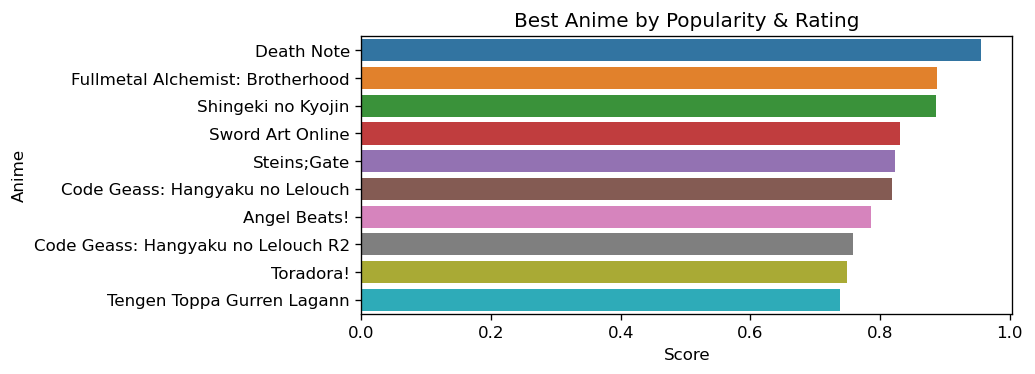

In [68]:
scored_data = weighted_data.sort_values(['score'], ascending=False)

ax = sns.barplot(data=scored_data, x=scored_data['score'].head(10), 
                 y=scored_data['name'].head(10))
plt.title('Best Anime by Popularity & Rating')
plt.xlabel('Score')
plt.ylabel('Anime')

Normally, recommendation models relied on simple factors such as average rating, popularity, number of votes. However, to improve viewer experience, future recommemdation models will take into user account ratings of anime. This personalized approach will enable us to recommend anime base on individual preferences, thereby imporving the overall viewer satisfaction and engagement

### Collaborative Filtering

Now create a matrix that has the user id on one access and anime title on another axis. Each cell will consist of user rating to that anime. Note that will have a lot of NaN values, because most ppl have not seen most of anime. 

In [69]:
anime = data.pivot_table(index='user_id', columns='name', values='user_rating')
anime.head()

name,0,001,009 Re:Cyborg,009-1,009-1: RandB,00:08,07-Ghost,1+2=Paradise,100%,100-man-nen Chikyuu no Tabi: Bander Book,...,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Most rated anime
weighted_data.sort_values('review_count', ascending=False)[['anime_id', 'name', 'review_count']].head(10)

,anime_id,name,review_count
1388,1535,Death Note,34226
6322,11757,Sword Art Online,26310
7058,16498,Shingeki no Kyojin,25289
1426,1575,Code Geass: Hangyaku no Lelouch,24126
4567,6547,Angel Beats!,23565
201,226,Elfen Lied,23528
10,20,Naruto,22071
3936,5114,Fullmetal Alchemist: Brotherhood,21494
99,121,Fullmetal Alchemist,21332
2642,2904,Code Geass: Hangyaku no Lelouch R2,21124


Lets choose two animes: Tokyo Ghoul & Naruto. Grab the user rating for those two animes

In [71]:
# for i in weighted_data["name"].unique():
#     print(i)

In [72]:
tokyo_user_rating = anime['Tokyo Ghoul']
naruto_user_rating = anime['Naruto']
naruto_user_rating.head()

user_id
1    NaN
2    NaN
3    8.0
5    6.0
7    NaN
Name: Naruto, dtype: float64

Lets find animes has similar to One Piece & Naruto using correlation

In [73]:
similar_to_to = anime.corrwith(tokyo_user_rating)
similar_to_naruto = anime.corrwith(naruto_user_rating)

In [74]:
# Convert Series into dataframe and remove NaN values
corr_to = pd.DataFrame(similar_to_to, columns=['Correlation']).reset_index()
corr_to.dropna(inplace=True)

In [75]:
# Find the top 10 correlated animes with One Piece
corr_to.sort_values('Correlation', ascending=False).head(10)

,name,Correlation
1936,Doubutsu Sumo Taikai,1.0
5280,Majime ni Fumajime Kaiketsu Zorori: Nazo no Ot...,1.0
5217,Mahou no Shiho-chan,1.0
8863,Tokyo Ghoul,1.0
3411,Hiyoko Gumo,1.0
4588,Konchuu Monogatari Mitsubachi Hutch: Yuuki no ...,1.0
5985,Nameko-ke no Ichizoku,1.0
9634,Yoru no Hi,1.0
9626,Yonimo Osoroshii Grimm Douwa,1.0
815,Bikini Warriors OVA,1.0


After sorting the data by correlation, we get top 10 similar animes, note that some results that doesn't really make sense. Because there are a lot of animes only watched once by users who also watched one piece

In [76]:
# filtering out animes that have less than 100 reviews
corr_to = corr_to.merge(weighted_data[['review_count', 'name']], on='name')
corr_to.head()

,name,Correlation,review_count
0,0,0.447619,17
1,001,0.241337,10
2,009 Re:Cyborg,0.340172,238
3,009-1,0.278637,244
4,009-1: RandB,0.466146,98


In [77]:
corr_to[corr_to['review_count'] > 100].sort_values('Correlation', ascending=False).head()

,name,Correlation,review_count
7136,Tokyo Ghoul,1.000000,15061
6012,Sakura Taisen: Ouka Kenran,0.794472,107
7233,Toushinden,0.744851,106
4359,Maple Colors,0.728543,128
1902,Flanders no Inu (Movie),0.721970,134


#### Insights:
    According to this recommendation, the next anime will be Sakura Taisen... if the useer has been watched Tokyo Ghoul Film

Lets try Naruto anime

In [78]:
corr_naruto = pd.DataFrame(similar_to_naruto, columns=['Correlation']).reset_index()
corr_naruto.dropna(inplace=True)

corr_naruto.sort_values('Correlation', ascending=False).head(10)

,name,Correlation
6668,Pants no Ana,1.0
7052,Puttsun Make Love,1.0
6635,Oyako Club,1.0
6585,Otaku no Seiza,1.0
2271,Firestorm,1.0
1353,Circuit Angel: Ketsui no Starting Grid,1.0
9804,Zephyr,1.0
6556,Osaru no Kantai,1.0
6549,Origami Warriors,1.0
9150,Uchuu Senshi Baldios,1.0


In [79]:
corr_naruto = corr_naruto.merge(weighted_data[['review_count', 'name']], on='name')
corr_naruto.head()

,name,Correlation,review_count
0,0,0.493750,17
1,001,0.576639,10
2,009 Re:Cyborg,0.247293,238
3,009-1,0.124584,244
4,009-1: RandB,-0.115634,98


In [80]:
corr_naruto[corr_naruto['review_count'] > 100].sort_values('Correlation', ascending=False).head()

,name,Correlation,review_count
4998,Naruto,1.000000,22071
2182,Gekitou! Crush Gear Turbo,0.676698,109
5017,Naruto: Takigakure no Shitou - Ore ga Eiyuu Da...,0.612857,2719
5006,Naruto Soyokazeden Movie: Naruto to Mashin to ...,0.594234,884
6178,Salaryman Kintarou,0.592799,104


In [81]:
def find_recommended_anime(name):
    anime_user_rating = anime[name]
    similar_to_anime = anime.corrwith(anime_user_rating)
    corr_anime = pd.DataFrame(similar_to_anime, columns=['Correlation'])
    corr_anime.dropna(inplace=True)
    corr_anime = corr_anime.merge(weighted_data[['review_count', 'name']], on='name')
    
    return corr_anime[corr_anime['review_count'] > 200].sort_values('Correlation', ascending=False).head(5)

In [82]:
find_recommended_anime('Sword Art Online')

,name,Correlation,review_count
7192,Sword Art Online,1.000000,26310
7196,Sword Art Online: Extra Edition,0.704634,4454
7193,Sword Art Online II,0.699912,11496
7198,Sword Art Online: Sword Art Offline - Extra Ed...,0.575388,546
4927,Mobile Suit Gundam Seed Destiny Special Edition,0.568795,237
